In [1]:
#Importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno #To visualize missing values per column

In [2]:
#code to show full rows in output
#pd.set_option('display.max_rows', None)

In [3]:
#Read data
rawdata = pd.read_excel("Part A UVAQA0864X.xlsx", sheet_name='Exhibit 1 -- Data')

In [4]:
rawdata

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

In [6]:
rawdata.drop([2389,2390,2391], axis=0, inplace=True)

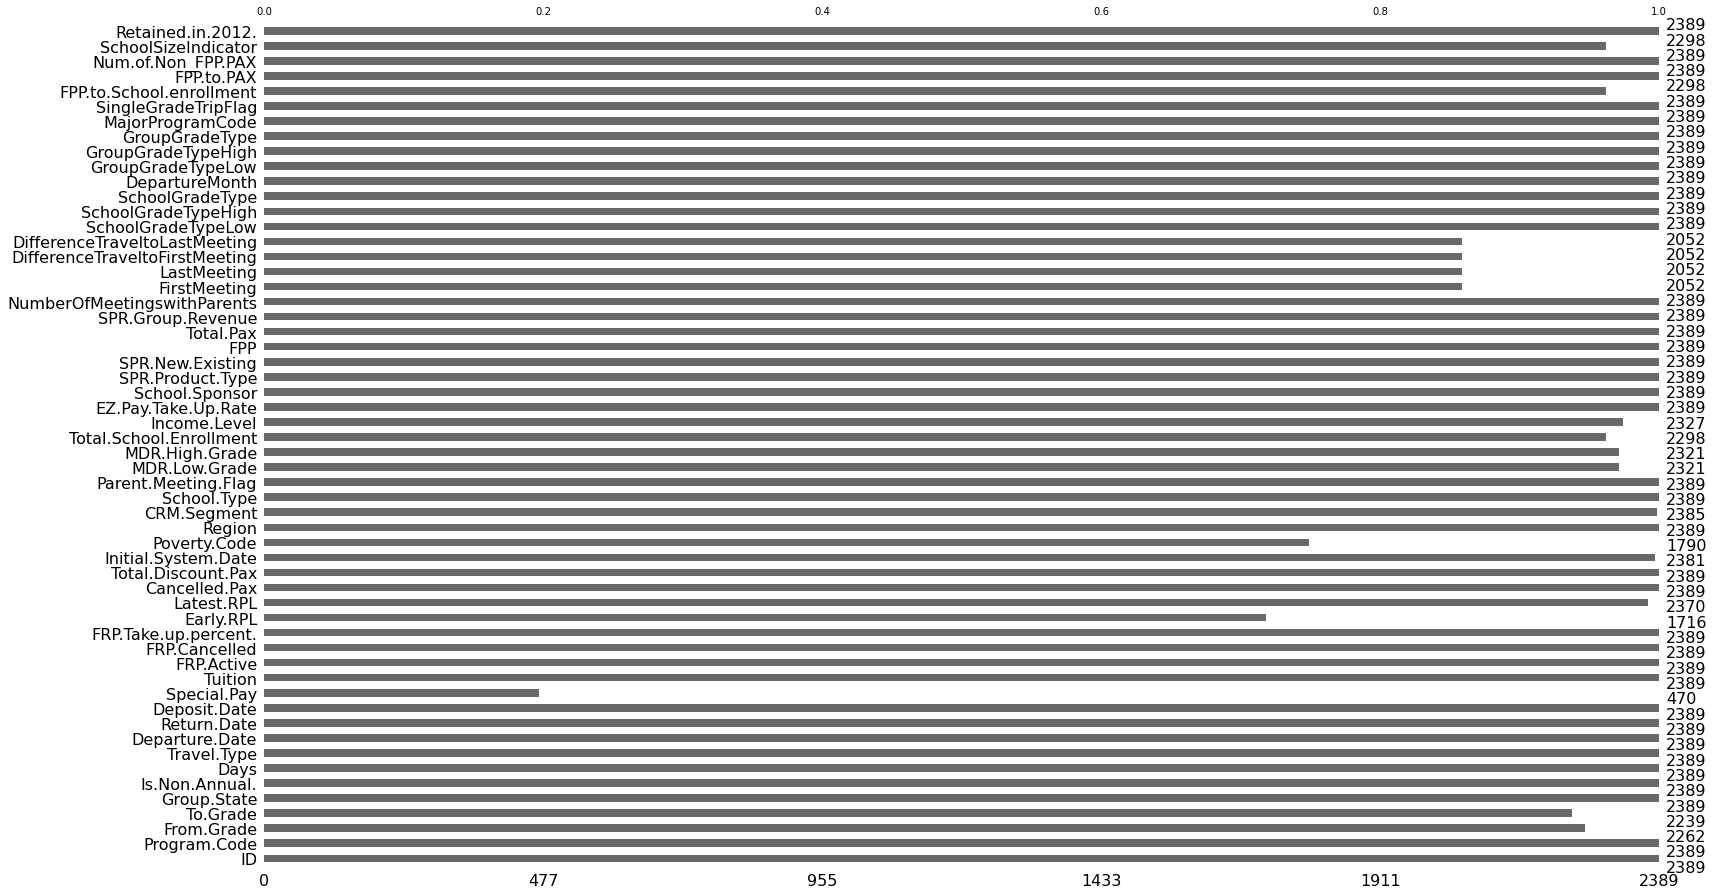

In [7]:
#Visualize how much missing data
msno.bar(rawdata)
plt.show()

In [8]:
#Creating dataframe with no 'Special.Pay' as there are a lot of null values
df1 = rawdata.copy()

In [9]:
df1.shape

(2389, 56)

Text(0.5, 1.0, 'No. of People Retained v/s Not Retained in 2012')

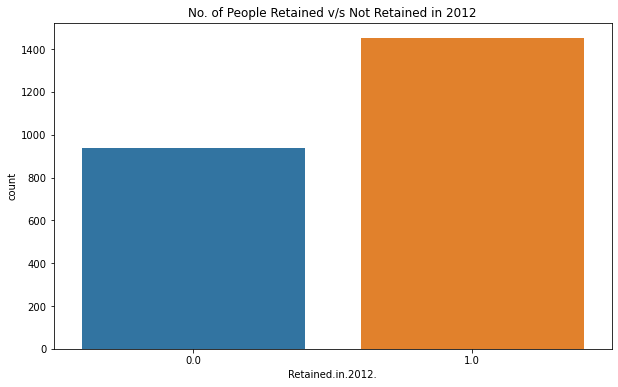

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Retained.in.2012.')
plt.title('No. of People Retained v/s Not Retained in 2012')

<AxesSubplot:>

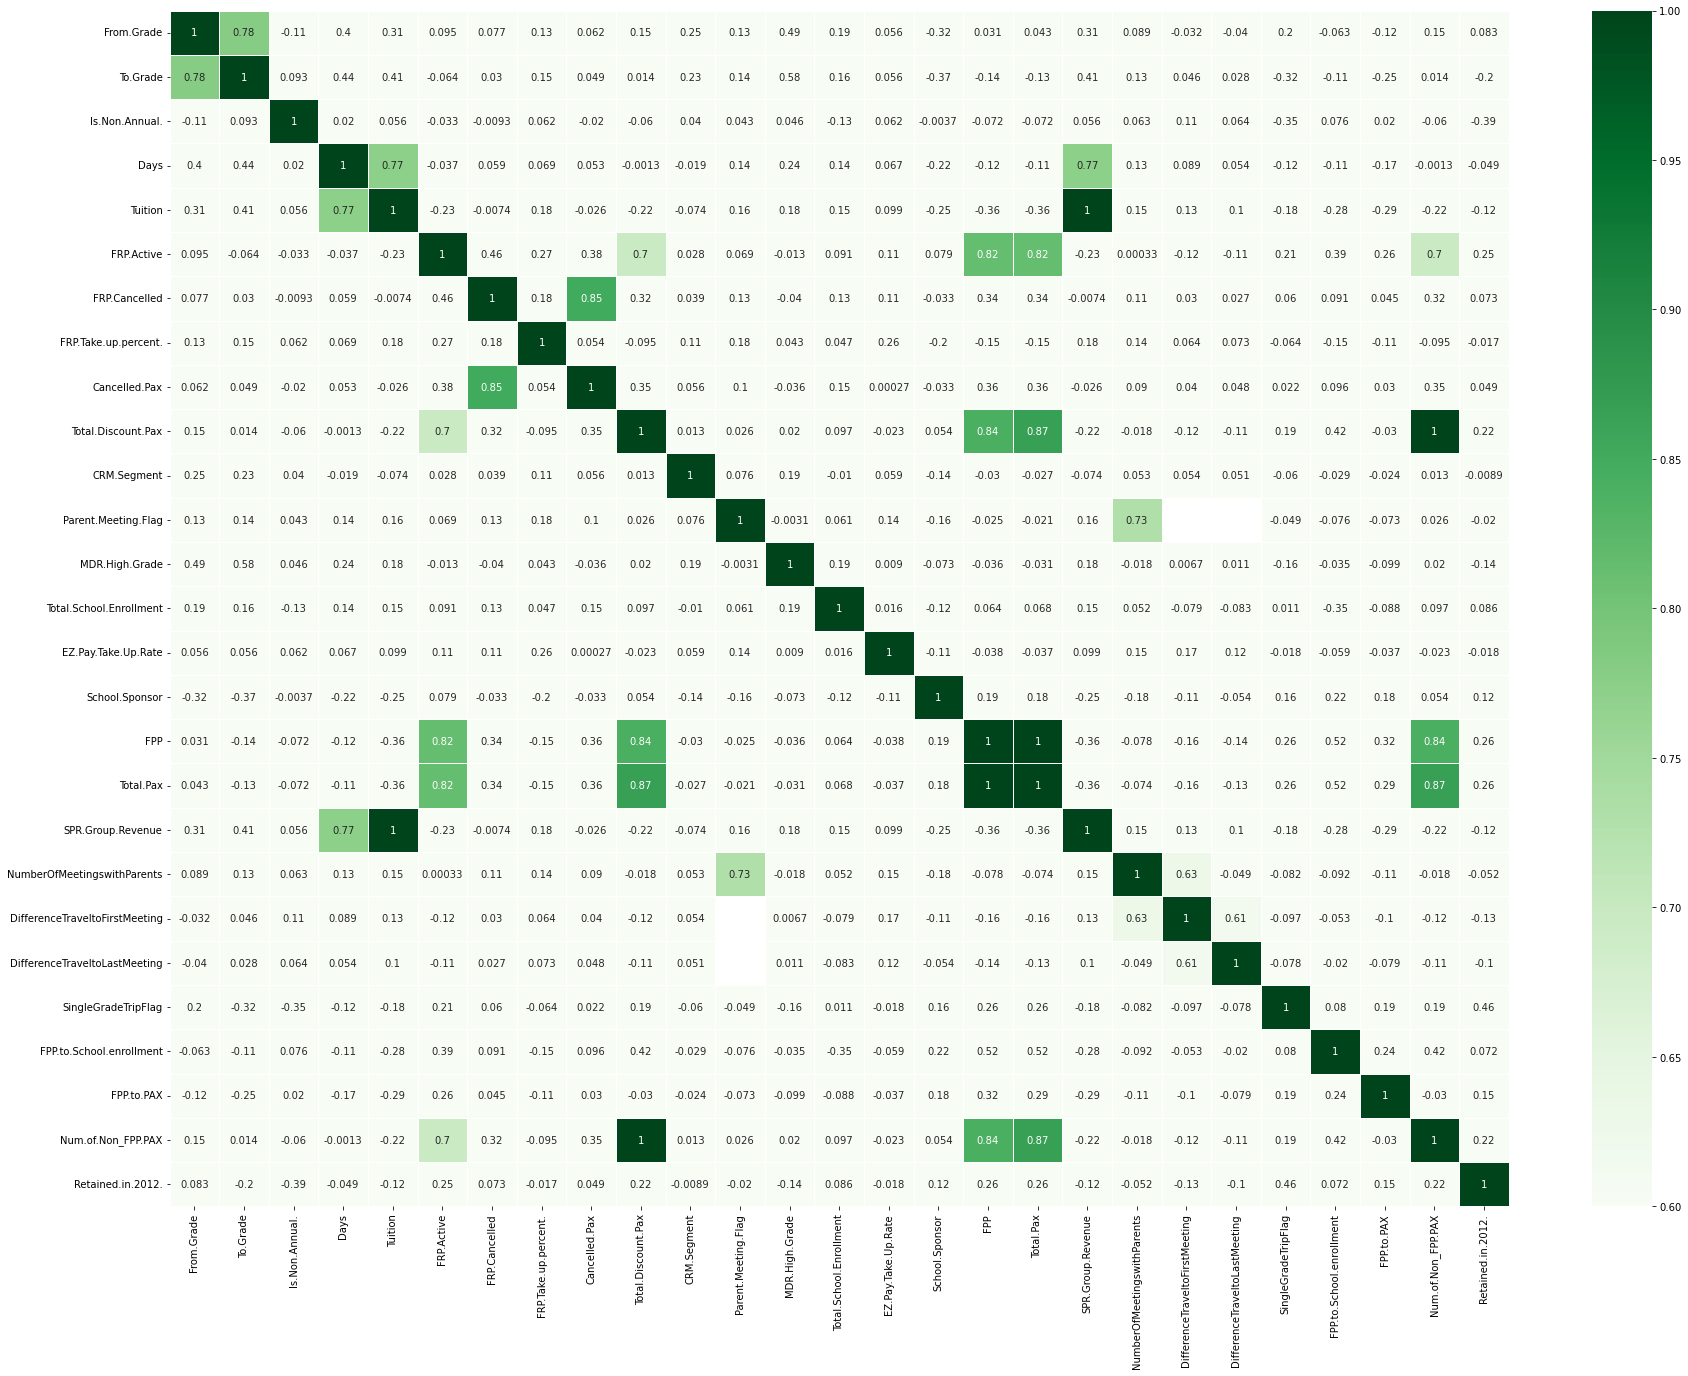

In [11]:
#Heatmap to check the correlation of features
plt.figure(figsize = (30,22)) #For Size increase
sns.heatmap(df1.corr(), annot=True, linewidths=.5, cmap="Greens", vmin= 0.6)

In [12]:
#Checking features correlation with 'Retention in 2012' column higher than 15%
correlation_mat = df1.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.4]


In [13]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

Retained.in.2012.  Is.Non.Annual.      -0.390633
Is.Non.Annual.     Retained.in.2012.   -0.390633
School.Sponsor     To.Grade            -0.370151
To.Grade           School.Sponsor      -0.370151
FPP                SPR.Group.Revenue   -0.364922
dtype: float64

In [14]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

Days                           From.Grade                       0.402515
From.Grade                     Days                             0.402515
To.Grade                       Tuition                          0.414692
Tuition                        To.Grade                         0.414692
To.Grade                       SPR.Group.Revenue                0.414692
                                                                  ...   
DifferenceTraveltoLastMeeting  DifferenceTraveltoLastMeeting    1.000000
SingleGradeTripFlag            SingleGradeTripFlag              1.000000
FPP.to.School.enrollment       FPP.to.School.enrollment         1.000000
Num.of.Non_FPP.PAX             Total.Discount.Pax               1.000000
Retained.in.2012.              Retained.in.2012.                1.000000
Length: 87, dtype: float64

In [15]:
#### List of positive correlations higher than 15%
#School.Sponsor                  Retained.in.2012.                 0.120717
#FPP.to.PAX                      Retained.in.2012.                 0.145107
#Total.Discount.Pax              Retained.in.2012.                 0.216218
#Num.of.Non_FPP.PAX              Retained.in.2012.                 0.216218
#FRP.Active                      Retained.in.2012.                 0.250478
#Total.Pax                       Retained.in.2012.                 0.260492
#FPP                             Retained.in.2012.                 0.261127
#SingleGradeTripFlag             Retained.in.2012.                 0.455872
####

In [16]:
#Creating dataframe with only the correlated columns
NumericalCol = df1[['School.Sponsor','FPP.to.PAX', 'Total.Discount.Pax', 'Num.of.Non_FPP.PAX', 'FRP.Active', 'Total.Pax', 'FPP', 'SingleGradeTripFlag', 'Retained.in.2012.']]

In [17]:
NumericalCol.head()

,School.Sponsor,FPP.to.PAX,Total.Discount.Pax,Num.of.Non_FPP.PAX,FRP.Active,Total.Pax,FPP,SingleGradeTripFlag,Retained.in.2012.
0,1.0,0.936508,4.0,4.0,25.0,63.0,59.0,1.0,1.0
1,0.0,0.880000,3.0,3.0,9.0,25.0,22.0,1.0,1.0
2,0.0,0.888889,3.0,3.0,17.0,27.0,24.0,1.0,1.0
3,0.0,1.000000,0.0,0.0,0.0,18.0,18.0,0.0,0.0
4,0.0,0.910112,8.0,8.0,40.0,89.0,81.0,0.0,0.0


Above dataframe contains only those columns which have numerical data and have at least 15% correlation with Retention column.

In [18]:
#Do chi squared test for categorical variables to find out if they affect retention or not. Once done, encode those columns. 
#Add those columns to NumCordf and do test train split and prediction model.

In [19]:
df2=df1.copy()

In [20]:
df2.dropna(inplace=True)

In [21]:
df2.shape

(192, 56)

In [22]:
categorical_columns = df2.select_dtypes(exclude = 'number').drop('ID', axis = 1).columns
categorical_columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Early.RPL', 'Latest.RPL',
       'Initial.System.Date', 'Poverty.Code', 'Region', 'School.Type',
       'MDR.Low.Grade', 'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'FirstMeeting', 'LastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

In [23]:
#To check for correlation
from scipy.stats import chi2_contingency

In [24]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df2['Retained.in.2012.'], df2[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                 Column                      Hypothesis
0          Program.Code  Fail to Reject Null Hypothesis
1           Group.State  Fail to Reject Null Hypothesis
2           Travel.Type  Fail to Reject Null Hypothesis
3        Departure.Date  Fail to Reject Null Hypothesis
4           Return.Date  Fail to Reject Null Hypothesis
5          Deposit.Date  Fail to Reject Null Hypothesis
6           Special.Pay  Fail to Reject Null Hypothesis
7             Early.RPL  Fail to Reject Null Hypothesis
8            Latest.RPL  Fail to Reject Null Hypothesis
9   Initial.System.Date  Fail to Reject Null Hypothesis
10         Poverty.Code  Fail to Reject Null Hypothesis
11               Region  Fail to Reject Null Hypothesis
12          School.Type  Fail to Reject Null Hypothesis
13        MDR.Low.Grade          Reject Null Hypothesis
14         Income.Level  Fail to Reject Null Hypothesis
15     SPR.Product.Type  Fail to Reject Null Hypothesis
16     SPR.New.Existing          Reject Null Hyp

The above test shows us which categorical columns are of importance with respect to retention.

In [25]:
df2= df1[['MDR.Low.Grade','SPR.New.Existing','LastMeeting','SchoolGradeTypeHigh','SchoolGradeType','GroupGradeTypeLow','GroupGradeTypeHigh','GroupGradeType','SchoolSizeIndicator']]

In [26]:
df2.head()

,MDR.Low.Grade,SPR.New.Existing,LastMeeting,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator
0,K,EXISTING,2010-08-12,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L
1,7,EXISTING,2010-08-27,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2,6,EXISTING,2010-09-13,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
3,NaN,EXISTING,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN
4,6,EXISTING,2010-08-24,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L


In [27]:
traintestdata = pd.concat([NumericalCol, df2], axis=1, join='inner')
traintestdata

,School.Sponsor,FPP.to.PAX,Total.Discount.Pax,Num.of.Non_FPP.PAX,FRP.Active,Total.Pax,FPP,SingleGradeTripFlag,Retained.in.2012.,MDR.Low.Grade,SPR.New.Existing,LastMeeting,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator
0,1.0,0.936508,4.0,4.0,25.0,63.0,59.0,1.0,1.0,K,EXISTING,2010-08-12,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L
1,0.0,0.880000,3.0,3.0,9.0,25.0,22.0,1.0,1.0,7,EXISTING,2010-08-27,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2,0.0,0.888889,3.0,3.0,17.0,27.0,24.0,1.0,1.0,6,EXISTING,2010-09-13,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
3,0.0,1.000000,0.0,0.0,0.0,18.0,18.0,0.0,0.0,NaN,EXISTING,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN
4,0.0,0.910112,8.0,8.0,40.0,89.0,81.0,0.0,0.0,6,EXISTING,2010-08-24,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0.0,0.921053,3.0,3.0,18.0,38.0,35.0,0.0,0.0,6,EXISTING,NaT,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2385,0.0,0.909091,2.0,2.0,16.0,22.0,20.0,1.0,1.0,K,EXISTING,2010-10-07,Middle,Middle->Middle,K,Middle,K->Middle,S-M
2386,0.0,0.882353,4.0,4.0,0.0,34.0,30.0,0.0,1.0,NaN,NEW,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN
2387,0.0,0.941176,1.0,1.0,3.0,17.0,16.0,1.0,1.0,NaN,NEW,2010-09-16,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,NaN


In [28]:
traintestdata.isna().sum()

School.Sponsor           0
FPP.to.PAX               0
Total.Discount.Pax       0
Num.of.Non_FPP.PAX       0
FRP.Active               0
Total.Pax                0
FPP                      0
SingleGradeTripFlag      0
Retained.in.2012.        0
MDR.Low.Grade           68
SPR.New.Existing         0
LastMeeting            337
SchoolGradeTypeHigh      0
SchoolGradeType          0
GroupGradeTypeLow        0
GroupGradeTypeHigh       0
GroupGradeType           0
SchoolSizeIndicator     91
dtype: int64

In [29]:
mode_Category = traintestdata['MDR.Low.Grade'].mode()[0]
traintestdata['MDR.Low.Grade'].fillna(mode_Category,inplace=True)
mode_Category_2 = traintestdata['SchoolSizeIndicator'].mode()[0]
traintestdata['SchoolSizeIndicator'].fillna(mode_Category_2,inplace=True)
traintestdata.drop(columns=['LastMeeting'],inplace=True)
traintestdata

,School.Sponsor,FPP.to.PAX,Total.Discount.Pax,Num.of.Non_FPP.PAX,FRP.Active,Total.Pax,FPP,SingleGradeTripFlag,Retained.in.2012.,MDR.Low.Grade,SPR.New.Existing,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator
0,1.0,0.936508,4.0,4.0,25.0,63.0,59.0,1.0,1.0,K,EXISTING,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L
1,0.0,0.880000,3.0,3.0,9.0,25.0,22.0,1.0,1.0,7,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2,0.0,0.888889,3.0,3.0,17.0,27.0,24.0,1.0,1.0,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
3,0.0,1.000000,0.0,0.0,0.0,18.0,18.0,0.0,0.0,6,EXISTING,High,High->High,Undefined,Undefined,Undefined->Undefined,S-M
4,0.0,0.910112,8.0,8.0,40.0,89.0,81.0,0.0,0.0,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0.0,0.921053,3.0,3.0,18.0,38.0,35.0,0.0,0.0,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2385,0.0,0.909091,2.0,2.0,16.0,22.0,20.0,1.0,1.0,K,EXISTING,Middle,Middle->Middle,K,Middle,K->Middle,S-M
2386,0.0,0.882353,4.0,4.0,0.0,34.0,30.0,0.0,1.0,6,NEW,High,High->High,Undefined,Undefined,Undefined->Undefined,S-M
2387,0.0,0.941176,1.0,1.0,3.0,17.0,16.0,1.0,1.0,6,NEW,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,S-M


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
la_mdr_low_Grade = LabelEncoder()
la_SPR_New_Existing = LabelEncoder()
la_SchoolGradeTypeHigh = LabelEncoder()
la_SchoolGradeType = LabelEncoder()
la_GroupGradeTypeLow = LabelEncoder()
la_GroupGradeTypeHigh = LabelEncoder()
la_GroupGradeType = LabelEncoder()
la_SchoolSizeIndicator = LabelEncoder()

In [32]:
traintestdata.dtypes

School.Sponsor         float64
FPP.to.PAX             float64
Total.Discount.Pax     float64
Num.of.Non_FPP.PAX     float64
FRP.Active             float64
Total.Pax              float64
FPP                    float64
SingleGradeTripFlag    float64
Retained.in.2012.      float64
MDR.Low.Grade           object
SPR.New.Existing        object
SchoolGradeTypeHigh     object
SchoolGradeType         object
GroupGradeTypeLow       object
GroupGradeTypeHigh      object
GroupGradeType          object
SchoolSizeIndicator     object
dtype: object

In [33]:
traintestdata['MDR.Low.Grade']=traintestdata['MDR.Low.Grade'].astype(str)

In [34]:
traintestdata['MDR.Low.Grade']=la_mdr_low_Grade.fit_transform(traintestdata['MDR.Low.Grade'])
traintestdata['SPR.New.Existing']=la_SPR_New_Existing.fit_transform(traintestdata['SPR.New.Existing'])
traintestdata['SchoolGradeTypeHigh']=la_SchoolGradeTypeHigh.fit_transform(traintestdata['SchoolGradeTypeHigh'])
traintestdata['SchoolGradeType']=la_SchoolGradeType.fit_transform(traintestdata['SchoolGradeType'])
traintestdata['GroupGradeTypeLow']=la_GroupGradeTypeLow.fit_transform(traintestdata['GroupGradeTypeLow'])
traintestdata['GroupGradeTypeHigh']=la_GroupGradeTypeHigh.fit_transform(traintestdata['GroupGradeTypeHigh'])
traintestdata['GroupGradeType']=la_GroupGradeType.fit_transform(traintestdata['GroupGradeType'])
traintestdata['SchoolSizeIndicator']=la_SchoolSizeIndicator.fit_transform(traintestdata['SchoolSizeIndicator'])

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [36]:
onehotencoder.fit_transform(traintestdata['MDR.Low.Grade'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['SPR.New.Existing'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['SchoolGradeTypeHigh'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['SchoolGradeType'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['GroupGradeTypeLow'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['GroupGradeTypeHigh'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['GroupGradeType'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(traintestdata['SchoolSizeIndicator'].values.reshape(-1,1)).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [37]:
traintestdata

,School.Sponsor,FPP.to.PAX,Total.Discount.Pax,Num.of.Non_FPP.PAX,FRP.Active,Total.Pax,FPP,SingleGradeTripFlag,Retained.in.2012.,MDR.Low.Grade,SPR.New.Existing,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator
0,1.0,0.936508,4.0,4.0,25.0,63.0,59.0,1.0,1.0,10,0,0,0,2,0,4,0
1,0.0,0.880000,3.0,3.0,9.0,25.0,22.0,1.0,1.0,7,0,2,6,3,2,8,0
2,0.0,0.888889,3.0,3.0,17.0,27.0,24.0,1.0,1.0,6,0,2,6,3,2,8,0
3,0.0,1.000000,0.0,0.0,0.0,18.0,18.0,0.0,0.0,6,0,1,4,5,3,12,3
4,0.0,0.910112,8.0,8.0,40.0,89.0,81.0,0.0,0.0,6,0,2,6,3,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0.0,0.921053,3.0,3.0,18.0,38.0,35.0,0.0,0.0,6,0,2,6,3,2,8,0
2385,0.0,0.909091,2.0,2.0,16.0,22.0,20.0,1.0,1.0,10,0,2,6,2,2,6,3
2386,0.0,0.882353,4.0,4.0,0.0,34.0,30.0,0.0,1.0,6,1,1,4,5,3,12,3
2387,0.0,0.941176,1.0,1.0,3.0,17.0,16.0,1.0,1.0,6,1,0,0,5,3,12,3


# 1. Logistic Regression

In [38]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traintestdata.drop('Retained.in.2012.',axis=1), 
                                                    traintestdata['Retained.in.2012.'], test_size=0.30, 
                                                    random_state=101)

In [39]:
#Instantiating regression object
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\fawaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred = logmodel.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
#Evaluating the logistic regression model
print("Accuracy:",round(metrics.accuracy_score(y_test, pred)*100,2),'%') 
print("Precision:",round(metrics.precision_score(y_test, pred)* 100, 2),'%')
print("Recall:",round(metrics.recall_score(y_test, pred)* 100, 2),'%')

##accuracy on the training set
print('Training set accuracy: ', round(logmodel.score(X_train, y_train) * 100, 2),'%')
## accuracy on the test set 
print('Test set accuracy: ', round(logmodel.score(X_test, y_test)*100, 2),'%')

Accuracy: 74.06 %
Precision: 77.2 %
Recall: 81.78 %
Training set accuracy:  75.54 %
Test set accuracy:  74.06 %


Text(0.5, 257.44, 'Predicted label')

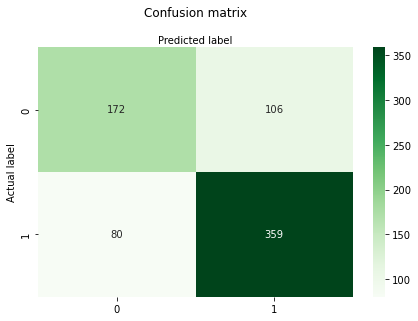

In [45]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

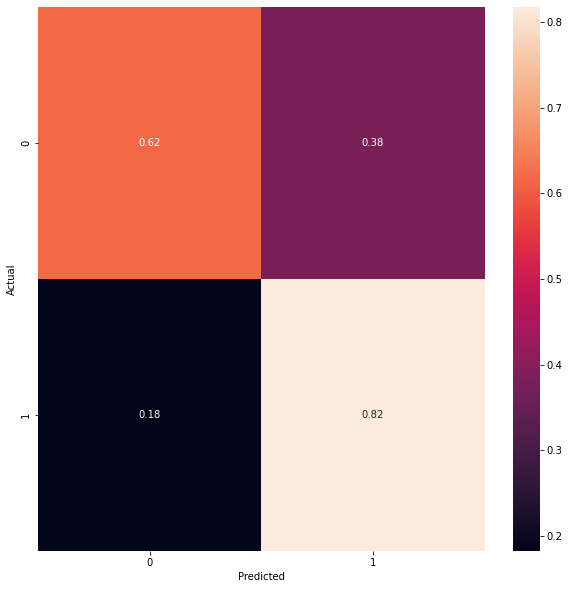

In [46]:
jn = confusion_matrix(y_test, pred)
# Normalise
znn = jn.astype('float') / jn.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(znn, annot=True, fmt='.2f', xticklabels='auto', yticklabels='auto')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

We are getting almost 75% accuracy with this model.

# 2. Support Vector Machines

In [47]:
from sklearn.svm import SVC

In [48]:
model = SVC()

In [49]:
model.fit(X_train,y_train)

SVC()

In [50]:
pred = model.predict(X_test)

In [51]:
#Evaluating the SVM model
print("Accuracy:",round(metrics.accuracy_score(y_test, pred)*100,2),'%') 
print("Precision:",round(metrics.precision_score(y_test, pred)* 100, 2),'%')
print("Recall:",round(metrics.recall_score(y_test, pred)* 100, 2),'%')

##accuracy on the training set
print('Training set accuracy: ', round(logmodel.score(X_train, y_train) * 100, 2),'%')
## accuracy on the test set 
print('Test set accuracy: ', round(logmodel.score(X_test, y_test)*100, 2),'%')

Accuracy: 66.81 %
Precision: 70.39 %
Recall: 79.04 %
Training set accuracy:  75.54 %
Test set accuracy:  74.06 %


Text(0.5, 257.44, 'Predicted label')

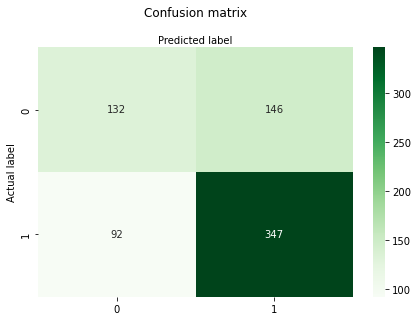

In [52]:
#Confusion matrix
cnf_matrix1 = metrics.confusion_matrix(y_test, pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
#Our model needs to have its parameters adjusted in order to give better accuracy. Grid Search allows us to find the 
#right parameters to use. We do this exercise in order to let sklearn these parameters for us.
from sklearn.model_selection import GridSearchCV

In [54]:
#Grid Search takes a dictionary as input that describes the parameter that should be tried on a model to train.
#The keys are actual parameters that go in the model that we are using (SVC). In general, C controls the cost of 
#misclassification on training data. Large C value gives low bias because we get penalised the cost of misclassificaation a 
#lot. With smaller C value, it does not penalise as much, which gives us higher bias and lower variance.
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [55]:
#Object instantiation
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.606 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.606 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.605 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.605 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.605 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.606 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.606 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.605 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.605 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.605 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.681 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.603 total time=   0.1s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.623 total time=   0.2s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.608 total time=   0.4s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.614 total time=   0.3s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.666 total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.666 total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.608 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.635 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.596 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.663 total time=   0.5s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.693 total time=   0.5s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.647 total time=   0.6s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [57]:
#This returns the combination of parameters that have the best cross validation score
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [58]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
#Evaluating the SVM model
print("Accuracy:",round(metrics.accuracy_score(y_test, grid_predictions)*100,2),'%') 
print("Precision:",round(metrics.precision_score(y_test, grid_predictions)* 100, 2),'%')
print("Recall:",round(metrics.recall_score(y_test, grid_predictions)* 100, 2),'%')

##accuracy on the training set
print('Training set accuracy: ', round(logmodel.score(X_train, y_train) * 100, 2),'%')
## accuracy on the test set 
print('Test set accuracy: ', round(logmodel.score(X_test, y_test)*100, 2),'%')

Accuracy: 71.97 %
Precision: 78.33 %
Recall: 74.94 %
Training set accuracy:  75.54 %
Test set accuracy:  74.06 %


With the help of gridsearch,we were able to find the best suited parameters for our mode. It can be clearly sees that our model is performing much better now as compared to earlier.

Text(0.5, 257.44, 'Predicted label')

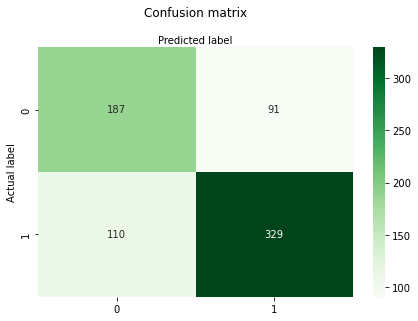

In [61]:
#Confusion matrix
cnf_matrix2 = metrics.confusion_matrix(y_test, grid_predictions)

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

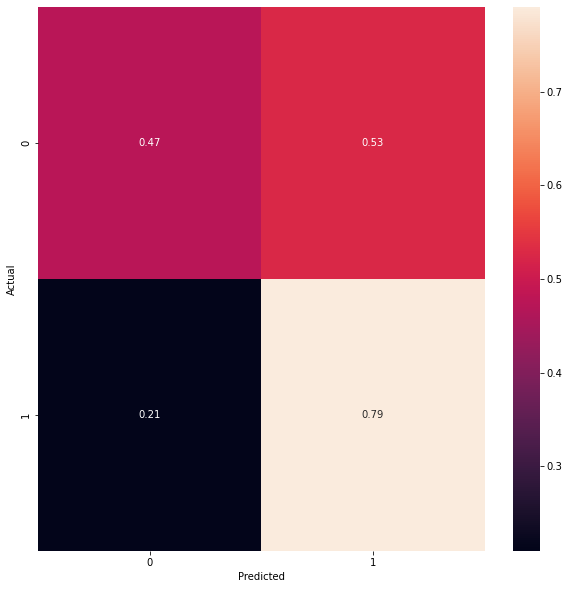

In [62]:
rh = confusion_matrix(y_test, pred)
# Normalise
znn = rh.astype('float') / rh.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(znn, annot=True, fmt='.2f', xticklabels='auto', yticklabels='auto')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

We are getting 72% accuracy with this model.